## An Enriching Meal
## Machine Learning

##### Blended Model
- XGBoost (35%)
- LightGBM (30%)
- Neural Network (30%)
- Random Forest (5%)

#### Public Leaderboard Test set AUC: 0.83972
#### Private Leaderboard Test set AUC: 0.83914

In [132]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [133]:
# import training set and create column identifying as train
training = pd.read_excel('TrainingSet.xlsx')
training['train_test_split']= 'Train'

In [134]:
# import test set and create column identifying as test
test = pd.read_excel('TestSet.xlsx')
test['train_test_split']='Test'

# Concatenate Training and Test set for feature engineering

In [135]:
train_test = pd.concat([training,test],axis=0)

# Feature Engineering

This is where we develop new features based off of the data in the current dataset




###### Compute average competency performance for each year.

In [136]:
# Building an average competency performance for the year 2009
train_test['comp_perf2009'] = train_test[['X_PMB_Engagement_2009','X_PMB_Teamwork_2009','X_PMB_Accountability_2009',
                                          'X_PMB_Action_2009','X_PMB_Values_2009']].mean(axis=1)

# Building an average competency performance for the year 2008
train_test['comp_perf2008'] = train_test[['X_PMB_ModelValues_2008','X_PMB_CreateExternalFocus_2008','X_PMB_AnticipateChange_2008',
                                           'X_PMB_ImplementQuality_2008','X_PMB_EvaluateAct_2008',
                                           'X_PMB_AchieveResultsPeople_2008','X_PMB_ShareKeyLearning_2008']].mean(axis=1)

# Building an average competency performance for the year 2007                               
train_test['comp_perf2007'] = train_test[['X_PMB_ModelValues_2007','X_PMB_CreateExternalFocus_2007',
                                           'X_PMB_AnticipateChange_2007',
                                           'X_PMB_ImplementQuality_2007','X_PMB_EvaluateAct_2007',
                                           'X_PMB_AchieveResultsPeople_2007','X_PMB_ShareKeyLearning_2007']].mean(axis=1)

# Building an average competency performance for the year 2006                               
train_test['comp_perf2006'] = train_test[['X_PMB_ModelValues_2006','X_PMB_CreateExternalFocus_2006','X_PMB_AnticipateChange_2006',
                                           'X_PMB_ImplementQuality_2006','X_PMB_EvaluateAct_2006',
                                           'X_PMB_AchieveResultsPeople_2006','X_PMB_ShareKeyLearning_2006']].mean(axis=1)

# Building an average competency performance for the year 2005                               
train_test['comp_perf2005'] = train_test[['X_PMB_ModelValues_2005','X_PMB_CreateExternalFocus_2005','X_PMB_AnticipateChange_2005',
                                           'X_PMB_ImplementQuality_2005','X_PMB_EvaluateAct_2005',
                                           'X_PMB_AchieveResultsPeople_2005','X_PMB_ShareKeyLearning_2005']].mean(axis=1)

###### Compute the standard deviation for competency for each year.

In [137]:
# Building a standard deviation competency performance for the year 2009
train_test['std_comp_perf2009'] = train_test[['X_PMB_Engagement_2009','X_PMB_Teamwork_2009','X_PMB_Accountability_2009',
                                          'X_PMB_Action_2009','X_PMB_Values_2009']].std(axis=1)

# Building a standard deviation competency performance for the year 2008
train_test['std_comp_perf2008'] = train_test[['X_PMB_ModelValues_2008','X_PMB_CreateExternalFocus_2008','X_PMB_AnticipateChange_2008',
                                           'X_PMB_ImplementQuality_2008','X_PMB_EvaluateAct_2008',
                                           'X_PMB_AchieveResultsPeople_2008','X_PMB_ShareKeyLearning_2008']].std(axis=1)

# Building a standard deviation competency performance for the year 2007                            
train_test['std_comp_perf2007'] = train_test[['X_PMB_ModelValues_2007','X_PMB_CreateExternalFocus_2007',
                                           'X_PMB_AnticipateChange_2007',
                                           'X_PMB_ImplementQuality_2007','X_PMB_EvaluateAct_2007',
                                           'X_PMB_AchieveResultsPeople_2007','X_PMB_ShareKeyLearning_2007']].std(axis=1)

# Building a standard deviation competency performance for the year 2006                             
train_test['std_comp_perf2006'] = train_test[['X_PMB_ModelValues_2006','X_PMB_CreateExternalFocus_2006','X_PMB_AnticipateChange_2006',
                                           'X_PMB_ImplementQuality_2006','X_PMB_EvaluateAct_2006',
                                           'X_PMB_AchieveResultsPeople_2006','X_PMB_ShareKeyLearning_2006']].std(axis=1)

# Building a standard deviation competency performance for the year 2005                              
train_test['std_comp_perf2005'] = train_test[['X_PMB_ModelValues_2005','X_PMB_CreateExternalFocus_2005','X_PMB_AnticipateChange_2005',
                                           'X_PMB_ImplementQuality_2005','X_PMB_EvaluateAct_2005',
                                           'X_PMB_AchieveResultsPeople_2005','X_PMB_ShareKeyLearning_2005']].std(axis=1)

Compute the average overall performance, standard deviation of overall performance, overall competency average, and overall competency standard deviation.

In [138]:
# Overall performance and competency based performance average and standard deviation 

train_test['Overall_Avg_Perf']= train_test[['X_OverallPerformanceRating2009','X_OverallPerformanceRating2008',
                                           'X_OverallPerformanceRating2007','X_OverallPerformanceRating2006',
                                           'X_OverallPerformanceRating2005','X_OverallPerformanceRating2004']].mean(axis=1)

train_test['Overall_STD_Perf']= train_test[['X_OverallPerformanceRating2009','X_OverallPerformanceRating2008',
                                           'X_OverallPerformanceRating2007','X_OverallPerformanceRating2006',
                                           'X_OverallPerformanceRating2005','X_OverallPerformanceRating2004']].std(axis=1)

train_test['Comp_Avg_Perf'] = train_test[['comp_perf2009','comp_perf2008','comp_perf2007','comp_perf2006',
                                         'comp_perf2005']].mean(axis=1)

train_test['Comp_STD_Perf'] = train_test[['comp_perf2009','comp_perf2008','comp_perf2007','comp_perf2006',
                                         'comp_perf2005']].std(axis=1)

Compute change over years for both competency and overall performance.

In [139]:
# Calculate performance change

train_test['Comp_PM_Change2006'] = train_test['comp_perf2006']-train_test['comp_perf2005']
train_test['Comp_PM_Change2007'] = train_test['comp_perf2007']-train_test['comp_perf2006']
train_test['Comp_PM_Change2008'] = train_test['comp_perf2008']-train_test['comp_perf2007']
train_test['Comp_PM_Change2009'] = train_test['comp_perf2009']-train_test['comp_perf2008']

train_test['Overall_Change2005'] = train_test['X_OverallPerformanceRating2005']-train_test['X_OverallPerformanceRating2004']
train_test['Overall_Change2006'] = train_test['X_OverallPerformanceRating2006']-train_test['X_OverallPerformanceRating2005']
train_test['Overall_Change2007'] = train_test['X_OverallPerformanceRating2007']-train_test['X_OverallPerformanceRating2006']
train_test['Overall_Change2008'] = train_test['X_OverallPerformanceRating2008']-train_test['X_OverallPerformanceRating2007']
train_test['Overall_Change2009'] = train_test['X_OverallPerformanceRating2009']-train_test['X_OverallPerformanceRating2008']

Identify the number of unique values for each global ID: 
- Supervisors
- Countries
- Cities
- job types
- sub functions
- functions
- paygrades

In [140]:
# creating a column that counts the number of unique supervisors an individual had

col_list = train_test[['S_SupervisorGlobal_ID2009', 'S_SupervisorGlobal_ID2008', 'S_SupervisorGlobal_ID2007', 'S_SupervisorGlobal_ID2006',
           'S_SupervisorGlobal_ID2005','S_SupervisorGlobal_ID2004']]

uniques=col_list.nunique(axis=1)

train_test['unique_supervisors']= uniques


# creating a column that counts the number of unique countries an individual has worked in

country_list = train_test[['X_Country2009', 'X_Country2008', 'X_Country2007', 'X_Country2006',
           'X_Country2005','X_Country2004']]

countries_unique=country_list.nunique(axis=1)

train_test['unique_countries']= countries_unique

# creating a column that counts the number of unique cities an individual has worked in

city_list = train_test[['X_City2009', 'X_City2008', 'X_City2007', 'X_City2006',
           'X_City2005','X_City2004']]

city_unique=city_list.nunique(axis=1)

train_test['unique_cities']= city_unique

# creating a column that counts the number of unique jobtypes an individual has had

job_list = train_test[['X_JobType2009', 'X_JobType2008', 'X_JobType2007', 'X_JobType2006',
           'X_JobType2005','X_JobType2004']]

job_unique=job_list.nunique(axis=1)

train_test['unique_jobs']= job_unique

# creating a column that counts the number of unique subfunctions an individual has had

subfunction_list = train_test[['X_JobSubFunction2009', 'X_JobSubFunction2008', 'X_JobSubFunction2007', 'X_JobSubFunction2006',
           'X_JobSubFunction2005','X_JobSubFunction2004']]

subfunction_unique=subfunction_list.nunique(axis=1)

train_test['unique_subfunctions']= subfunction_unique

train_test['unique_subfunctions'].unique()

# creating a column that counts the number of unique functions an individual has had

function_list = train_test[['X_JobFunction2009', 'X_JobFunction2008', 'X_JobFunction2007', 'X_JobFunction2006',
           'X_JobFunction2005','X_JobFunction2004']]

function_unique= function_list.nunique(axis=1)

train_test['unique_functions']= function_unique


# creating a column that counts the number of unique paygrades an individual has had

paygrade_list = train_test[['X_PayGradeLevel2009','X_PayGradeLevel2008','X_PayGradeLevel2007','X_PayGradeLevel2006',
                           'X_PayGradeLevel2005','X_PayGradeLevel2004']]

paygrade_unique = paygrade_list.nunique(axis=1)

train_test['paygrade_changes'] = paygrade_unique

In [142]:
# calculate gender differences amongst supervisor and employee

sup_gender_2009 = train_test[['S_Gender2009','X_Gender']]

sup_gender_dif_2009 = sup_gender_2009.nunique(axis=1)

sup_gender_2008 = train_test[['S_Gender2008','X_Gender']]

sup_gender_dif_2008 = sup_gender_2008.nunique(axis=1)

sup_gender_2007 = train_test[['S_Gender2007','X_Gender']]

sup_gender_dif_2007 = sup_gender_2007.nunique(axis=1)

In [143]:
# map gender differences as categorical

train_test['sup_emp_gender_dif_2009'] = sup_gender_dif_2009.apply(lambda x: 1 if x==2 else 0)
train_test['sup_emp_gender_dif_2008'] = sup_gender_dif_2008.apply(lambda x: 1 if x==2 else 0)

In [144]:
# Convert hire date to datetime format and then extract year into it's own column
train_test['X_ServiceEntryDate'] = pd.to_datetime(train_test['X_ServiceEntryDate'],format='%Y%m%d')
train_test['hire_year'] = train_test['X_ServiceEntryDate'].dt.year

In [145]:
# build a binary feature for those hired before 2005
train_test['hire_before_2005'] = train_test['hire_year'].apply(lambda x: 1 if x<2005 else 0)

calculate interactions between number of unique supervisors and interactions and age and tenure interactions.

In [146]:
# calculate supervisor changes by tenure

train_test['sup_ten_inter']= train_test['unique_supervisors']*train_test['X_TenureDays2009']

# calculate age by tenure interaction

train_test['age_tenure_inter']= train_test['X_TenureDays2009']*train_test['X_Age2009']

In [147]:
# calculate whether or not the supervisor had a performance rating in 2009 
#proxy for whether or not the supervisor is new

train_test['new_sup'] = train_test['S_OverallPerformanceRating2009'].isnull()
train_test['S_OPR_N_2009'] = train_test['new_sup'].apply(lambda x: 1 if x==True else 0)

In [148]:
# calculate whether or not the supervisor had a share key learnings rating in 2005
train_test['skl_2005'] = train_test['S_PMB_ShareKeyLearning_2005'].isnull()
train_test['S_PMB_SHA_N_2005'] = train_test['skl_2005'].apply(lambda x: 1 if x==True else 0)

In [149]:
# z-score transformation for 2005 performance scores
# this method was used instead of standardscalar() to avoid imputing data at this point

S_OverallPerformanceRating2005_mean = train_test['S_OverallPerformanceRating2005'].mean()
S_OverallPerformanceRating2005_STD = train_test['S_OverallPerformanceRating2005'].std()
train_test['S_OverallPerformanceRating2005_Z'] = (train_test['S_OverallPerformanceRating2005']-
                                    S_OverallPerformanceRating2005_mean)/S_OverallPerformanceRating2005_STD

S_PMB_ModelValues_2005_mean = train_test['S_PMB_ModelValues_2005'].mean()
S_PMB_ModelValues_2005_STD = train_test['S_PMB_ModelValues_2005'].std()
train_test['S_PMB_ModelValues_2005_Z'] = (train_test['S_PMB_ModelValues_2005']-
                                    S_PMB_ModelValues_2005_mean)/S_PMB_ModelValues_2005_STD

S_PMB_CreateExternalFocus_2005_mean = train_test['S_PMB_CreateExternalFocus_2005'].mean()
S_PMB_CreateExternalFocus_2005_STD = train_test['S_PMB_CreateExternalFocus_2005'].std()
train_test['S_PMB_CreateExternalFocus_2005_Z'] = (train_test['S_PMB_CreateExternalFocus_2005']-
                                    S_PMB_CreateExternalFocus_2005_mean)/S_PMB_CreateExternalFocus_2005_STD

S_PMB_AnticipateChange_2005_mean = train_test['S_PMB_AnticipateChange_2005'].mean()
S_PMB_AnticipateChange_2005_STD = train_test['S_PMB_AnticipateChange_2005'].std()
train_test['S_PMB_AnticipateChange_2005_Z'] = (train_test['S_PMB_AnticipateChange_2005']-
                                    S_PMB_AnticipateChange_2005_mean)/S_PMB_AnticipateChange_2005_STD

S_PMB_ImplementQuality_2005_mean = train_test['S_PMB_ImplementQuality_2005'].mean()
S_PMB_ImplementQuality_2005_STD = train_test['S_PMB_ImplementQuality_2005'].std()
train_test['S_PMB_ImplementQuality_2005_Z'] = (train_test['S_PMB_ImplementQuality_2005']-
                                    S_PMB_ImplementQuality_2005_mean)/S_PMB_ImplementQuality_2005_STD

S_PMB_EvaluateAct_2005_mean = train_test['S_PMB_EvaluateAct_2005'].mean()
S_PMB_EvaluateAct_2005_STD = train_test['S_PMB_EvaluateAct_2005'].std()
train_test['S_PMB_EvaluateAct_2005_Z'] = (train_test['S_PMB_EvaluateAct_2005']-
                                    S_PMB_EvaluateAct_2005_mean)/S_PMB_EvaluateAct_2005_STD

S_PMB_AchieveResultsPeople_2005_mean = train_test['S_PMB_AchieveResultsPeople_2005'].mean()
S_PMB_AchieveResultsPeople_2005_STD = train_test['S_PMB_AchieveResultsPeople_2005'].std()
train_test['S_PMB_AchieveResultsPeople_2005_Z'] = (train_test['S_PMB_AchieveResultsPeople_2005']-
                                    S_PMB_AchieveResultsPeople_2005_mean)/S_PMB_AchieveResultsPeople_2005_STD

S_PMB_ShareKeyLearning_2005_mean = train_test['S_PMB_ShareKeyLearning_2005'].mean()
S_PMB_ShareKeyLearning_2005_STD = train_test['S_PMB_ShareKeyLearning_2005'].std()
train_test['S_PMB_ShareKeyLearning_2005_Z'] = (train_test['S_PMB_ShareKeyLearning_2005']-
                                    S_PMB_ShareKeyLearning_2005_mean)/S_PMB_ShareKeyLearning_2005_STD

train_test['S_OPR_COMP_2005'] = train_test[['S_OverallPerformanceRating2005_Z','S_PMB_ModelValues_2005_Z',
                                           'S_PMB_CreateExternalFocus_2005_Z','S_PMB_AnticipateChange_2005_Z',
                                          'S_PMB_EvaluateAct_2005_Z', 'S_PMB_AchieveResultsPeople_2005_Z',
                                           'S_PMB_ShareKeyLearning_2005_Z']].mean(axis=1)

train_test['S_OPR_COMP_2005'].replace(np.nan,0,inplace=True)

In [150]:
# z-score transformation for 2006 performance scores
# this method was used instead of standardscalar() to avoid imputing data at this point

S_OverallPerformanceRating2006_mean = train_test['S_OverallPerformanceRating2006'].mean()
S_OverallPerformanceRating2006_STD = train_test['S_OverallPerformanceRating2006'].std()
train_test['S_OverallPerformanceRating2006_Z'] = (train_test['S_OverallPerformanceRating2006']-
                                    S_OverallPerformanceRating2006_mean)/S_OverallPerformanceRating2006_STD

S_PMB_ModelValues_2006_mean = train_test['S_PMB_ModelValues_2006'].mean()
S_PMB_ModelValues_2006_STD = train_test['S_PMB_ModelValues_2006'].std()
train_test['S_PMB_ModelValues_2006_Z'] = (train_test['S_PMB_ModelValues_2006']-
                                    S_PMB_ModelValues_2006_mean)/S_PMB_ModelValues_2006_STD

S_PMB_CreateExternalFocus_2006_mean = train_test['S_PMB_CreateExternalFocus_2006'].mean()
S_PMB_CreateExternalFocus_2006_STD = train_test['S_PMB_CreateExternalFocus_2006'].std()
train_test['S_PMB_CreateExternalFocus_2006_Z'] = (train_test['S_PMB_CreateExternalFocus_2006']-
                                    S_PMB_CreateExternalFocus_2006_mean)/S_PMB_CreateExternalFocus_2006_STD

S_PMB_AnticipateChange_2006_mean = train_test['S_PMB_AnticipateChange_2006'].mean()
S_PMB_AnticipateChange_2006_STD = train_test['S_PMB_AnticipateChange_2006'].std()
train_test['S_PMB_AnticipateChange_2006_Z'] = (train_test['S_PMB_AnticipateChange_2006']-
                                    S_PMB_AnticipateChange_2006_mean)/S_PMB_AnticipateChange_2006_STD

S_PMB_ImplementQuality_2006_mean = train_test['S_PMB_ImplementQuality_2006'].mean()
S_PMB_ImplementQuality_2006_STD = train_test['S_PMB_ImplementQuality_2006'].std()
train_test['S_PMB_ImplementQuality_2006_Z'] = (train_test['S_PMB_ImplementQuality_2006']-
                                    S_PMB_ImplementQuality_2006_mean)/S_PMB_ImplementQuality_2006_STD

S_PMB_EvaluateAct_2006_mean = train_test['S_PMB_EvaluateAct_2006'].mean()
S_PMB_EvaluateAct_2006_STD = train_test['S_PMB_EvaluateAct_2006'].std()
train_test['S_PMB_EvaluateAct_2006_Z'] = (train_test['S_PMB_EvaluateAct_2006']-
                                    S_PMB_EvaluateAct_2006_mean)/S_PMB_EvaluateAct_2006_STD

S_PMB_AchieveResultsPeople_2006_mean = train_test['S_PMB_AchieveResultsPeople_2006'].mean()
S_PMB_AchieveResultsPeople_2006_STD = train_test['S_PMB_AchieveResultsPeople_2006'].std()
train_test['S_PMB_AchieveResultsPeople_2006_Z'] = (train_test['S_PMB_AchieveResultsPeople_2006']-
                                    S_PMB_AchieveResultsPeople_2006_mean)/S_PMB_AchieveResultsPeople_2006_STD

S_PMB_ShareKeyLearning_2006_mean = train_test['S_PMB_ShareKeyLearning_2006'].mean()
S_PMB_ShareKeyLearning_2006_STD = train_test['S_PMB_ShareKeyLearning_2006'].std()
train_test['S_PMB_ShareKeyLearning_2006_Z'] = (train_test['S_PMB_ShareKeyLearning_2006']-
                                    S_PMB_ShareKeyLearning_2006_mean)/S_PMB_ShareKeyLearning_2006_STD

train_test['S_OPR_COMP_2006'] = train_test[['S_OverallPerformanceRating2006_Z','S_PMB_ModelValues_2006_Z',
                                           'S_PMB_CreateExternalFocus_2006_Z','S_PMB_AnticipateChange_2006_Z',
                                          'S_PMB_EvaluateAct_2006_Z', 'S_PMB_AchieveResultsPeople_2006_Z',
                                           'S_PMB_ShareKeyLearning_2006_Z']].mean(axis=1)

train_test['S_OPR_COMP_2006'].replace(np.nan,0,inplace=True)

In [151]:
# z-score transformation for 2007 performance scores
# this method was used instead of standardscalar() to avoid imputing data at this point

S_OverallPerformanceRating2007_mean = train_test['S_OverallPerformanceRating2007'].mean()
S_OverallPerformanceRating2007_STD = train_test['S_OverallPerformanceRating2007'].std()
train_test['S_OverallPerformanceRating2007_Z'] = (train_test['S_OverallPerformanceRating2007']-
                                    S_OverallPerformanceRating2007_mean)/S_OverallPerformanceRating2007_STD

S_PMB_ModelValues_2007_mean = train_test['S_PMB_ModelValues_2007'].mean()
S_PMB_ModelValues_2007_STD = train_test['S_PMB_ModelValues_2007'].std()
train_test['S_PMB_ModelValues_2007_Z'] = (train_test['S_PMB_ModelValues_2007']-
                                    S_PMB_ModelValues_2007_mean)/S_PMB_ModelValues_2007_STD

S_PMB_CreateExternalFocus_2007_mean = train_test['S_PMB_CreateExternalFocus_2007'].mean()
S_PMB_CreateExternalFocus_2007_STD = train_test['S_PMB_CreateExternalFocus_2007'].std()
train_test['S_PMB_CreateExternalFocus_2007_Z'] = (train_test['S_PMB_CreateExternalFocus_2007']-
                                    S_PMB_CreateExternalFocus_2007_mean)/S_PMB_CreateExternalFocus_2007_STD

S_PMB_AnticipateChange_2007_mean = train_test['S_PMB_AnticipateChange_2007'].mean()
S_PMB_AnticipateChange_2007_STD = train_test['S_PMB_AnticipateChange_2007'].std()
train_test['S_PMB_AnticipateChange_2007_Z'] = (train_test['S_PMB_AnticipateChange_2007']-
                                    S_PMB_AnticipateChange_2007_mean)/S_PMB_AnticipateChange_2007_STD

S_PMB_ImplementQuality_2007_mean = train_test['S_PMB_ImplementQuality_2007'].mean()
S_PMB_ImplementQuality_2007_STD = train_test['S_PMB_ImplementQuality_2007'].std()
train_test['S_PMB_ImplementQuality_2007_Z'] = (train_test['S_PMB_ImplementQuality_2007']-
                                    S_PMB_ImplementQuality_2007_mean)/S_PMB_ImplementQuality_2007_STD

S_PMB_EvaluateAct_2007_mean = train_test['S_PMB_EvaluateAct_2007'].mean()
S_PMB_EvaluateAct_2007_STD = train_test['S_PMB_EvaluateAct_2007'].std()
train_test['S_PMB_EvaluateAct_2007_Z'] = (train_test['S_PMB_EvaluateAct_2007']-
                                    S_PMB_EvaluateAct_2007_mean)/S_PMB_EvaluateAct_2007_STD

S_PMB_AchieveResultsPeople_2007_mean = train_test['S_PMB_AchieveResultsPeople_2007'].mean()
S_PMB_AchieveResultsPeople_2007_STD = train_test['S_PMB_AchieveResultsPeople_2007'].std()
train_test['S_PMB_AchieveResultsPeople_2007_Z'] = (train_test['S_PMB_AchieveResultsPeople_2007']-
                                    S_PMB_AchieveResultsPeople_2007_mean)/S_PMB_AchieveResultsPeople_2007_STD

S_PMB_ShareKeyLearning_2007_mean = train_test['S_PMB_ShareKeyLearning_2007'].mean()
S_PMB_ShareKeyLearning_2007_STD = train_test['S_PMB_ShareKeyLearning_2007'].std()
train_test['S_PMB_ShareKeyLearning_2007_Z'] = (train_test['S_PMB_ShareKeyLearning_2007']-
                                    S_PMB_ShareKeyLearning_2007_mean)/S_PMB_ShareKeyLearning_2007_STD

train_test['S_OPR_COMP_2007'] = train_test[['S_OverallPerformanceRating2007_Z','S_PMB_ModelValues_2007_Z',
                                           'S_PMB_CreateExternalFocus_2007_Z','S_PMB_AnticipateChange_2007_Z',
                                          'S_PMB_EvaluateAct_2007_Z', 'S_PMB_AchieveResultsPeople_2007_Z',
                                           'S_PMB_ShareKeyLearning_2007_Z']].mean(axis=1)

train_test['S_OPR_COMP_2007'].replace(np.nan,0,inplace=True)

In [152]:
# z-score transformation for 2008 performance scores
# this method was used instead of standardscalar() to avoid imputing data at this point

S_OverallPerformanceRating2008_mean = train_test['S_OverallPerformanceRating2008'].mean()
S_OverallPerformanceRating2008_STD = train_test['S_OverallPerformanceRating2008'].std()
train_test['S_OverallPerformanceRating2008_Z'] = (train_test['S_OverallPerformanceRating2008']-
                                    S_OverallPerformanceRating2008_mean)/S_OverallPerformanceRating2008_STD

S_PMB_ModelValues_2008_mean = train_test['S_PMB_ModelValues_2008'].mean()
S_PMB_ModelValues_2008_STD = train_test['S_PMB_ModelValues_2008'].std()
train_test['S_PMB_ModelValues_2008_Z'] = (train_test['S_PMB_ModelValues_2008']-
                                    S_PMB_ModelValues_2008_mean)/S_PMB_ModelValues_2008_STD

S_PMB_CreateExternalFocus_2008_mean = train_test['S_PMB_CreateExternalFocus_2008'].mean()
S_PMB_CreateExternalFocus_2008_STD = train_test['S_PMB_CreateExternalFocus_2008'].std()
train_test['S_PMB_CreateExternalFocus_2008_Z'] = (train_test['S_PMB_CreateExternalFocus_2008']-
                                    S_PMB_CreateExternalFocus_2008_mean)/S_PMB_CreateExternalFocus_2008_STD

S_PMB_AnticipateChange_2008_mean = train_test['S_PMB_AnticipateChange_2008'].mean()
S_PMB_AnticipateChange_2008_STD = train_test['S_PMB_AnticipateChange_2008'].std()
train_test['S_PMB_AnticipateChange_2008_Z'] = (train_test['S_PMB_AnticipateChange_2008']-
                                    S_PMB_AnticipateChange_2008_mean)/S_PMB_AnticipateChange_2008_STD

S_PMB_ImplementQuality_2008_mean = train_test['S_PMB_ImplementQuality_2008'].mean()
S_PMB_ImplementQuality_2008_STD = train_test['S_PMB_ImplementQuality_2008'].std()
train_test['S_PMB_ImplementQuality_2008_Z'] = (train_test['S_PMB_ImplementQuality_2008']-
                                    S_PMB_ImplementQuality_2008_mean)/S_PMB_ImplementQuality_2008_STD

S_PMB_EvaluateAct_2008_mean = train_test['S_PMB_EvaluateAct_2008'].mean()
S_PMB_EvaluateAct_2008_STD = train_test['S_PMB_EvaluateAct_2008'].std()
train_test['S_PMB_EvaluateAct_2008_Z'] = (train_test['S_PMB_EvaluateAct_2008']-
                                    S_PMB_EvaluateAct_2008_mean)/S_PMB_EvaluateAct_2008_STD

S_PMB_AchieveResultsPeople_2008_mean = train_test['S_PMB_AchieveResultsPeople_2008'].mean()
S_PMB_AchieveResultsPeople_2008_STD = train_test['S_PMB_AchieveResultsPeople_2008'].std()
train_test['S_PMB_AchieveResultsPeople_2008_Z'] = (train_test['S_PMB_AchieveResultsPeople_2008']-
                                    S_PMB_AchieveResultsPeople_2008_mean)/S_PMB_AchieveResultsPeople_2008_STD

S_PMB_ShareKeyLearning_2008_mean = train_test['S_PMB_ShareKeyLearning_2008'].mean()
S_PMB_ShareKeyLearning_2008_STD = train_test['S_PMB_ShareKeyLearning_2008'].std()
train_test['S_PMB_ShareKeyLearning_2008_Z'] = (train_test['S_PMB_ShareKeyLearning_2008']-
                                    S_PMB_ShareKeyLearning_2008_mean)/S_PMB_ShareKeyLearning_2008_STD

train_test['S_OPR_COMP_2008'] = train_test[['S_OverallPerformanceRating2008_Z','S_PMB_ModelValues_2008_Z',
                                           'S_PMB_CreateExternalFocus_2008_Z','S_PMB_AnticipateChange_2008_Z',
                                          'S_PMB_EvaluateAct_2008_Z', 'S_PMB_AchieveResultsPeople_2008_Z',
                                           'S_PMB_ShareKeyLearning_2008_Z']].mean(axis=1)

train_test['S_OPR_COMP_2008'].replace(np.nan,0,inplace=True)

In [153]:
# z-score transformation for 2009 performance scores
# this method was used instead of standardscalar() to avoid imputing data at this point

S_OverallPerformanceRating2009_mean = train_test['S_OverallPerformanceRating2009'].mean()
S_OverallPerformanceRating2009_STD = train_test['S_OverallPerformanceRating2009'].std()
train_test['S_OverallPerformanceRating2009_Z'] = (train_test['S_OverallPerformanceRating2009']-
                                    S_OverallPerformanceRating2009_mean)/S_OverallPerformanceRating2009_STD

S_PMB_Engagement_2009_mean = train_test['S_PMB_Engagement_2009'].mean()
S_PMB_Engagement_2009_STD = train_test['S_PMB_Engagement_2009'].std()
train_test['S_PMB_Engagement_2009_Z'] = (train_test['S_PMB_Engagement_2009']-
                                    S_PMB_Engagement_2009_mean)/S_PMB_Engagement_2009_STD

S_PMB_Teamwork_2009_mean = train_test['S_PMB_Teamwork_2009'].mean()
S_PMB_Teamwork_2009_STD = train_test['S_PMB_Teamwork_2009'].std()
train_test['S_PMB_Teamwork_2009_Z'] = (train_test['S_PMB_Teamwork_2009']-
                                    S_PMB_Teamwork_2009_mean)/S_PMB_Teamwork_2009_STD

S_PMB_Accountability_2009_mean = train_test['S_PMB_Accountability_2009'].mean()
S_PMB_Accountability_2009_STD = train_test['S_PMB_Accountability_2009'].std()
train_test['S_PMB_Accountability_2009_Z'] = (train_test['S_PMB_Accountability_2009']-
                                    S_PMB_Accountability_2009_mean)/S_PMB_Accountability_2009_STD

S_PMB_Action_2009_mean = train_test['S_PMB_Action_2009'].mean()
S_PMB_Action_2009_STD = train_test['S_PMB_Action_2009'].std()
train_test['S_PMB_Action_2009_Z'] = (train_test['S_PMB_Action_2009']-
                                    S_PMB_Action_2009_mean)/S_PMB_Action_2009_STD

S_PMB_Values_2009_mean = train_test['S_PMB_Values_2009'].mean()
S_PMB_Values_2009_STD = train_test['S_PMB_Values_2009'].std()
train_test['S_PMB_Values_2009_Z'] = (train_test['S_PMB_Values_2009']-
                                    S_PMB_Values_2009_mean)/S_PMB_Values_2009_STD

train_test['S_OPR_COMP_2009'] = train_test[['S_OverallPerformanceRating2009_Z','S_PMB_Engagement_2009_Z',
                                           'S_PMB_Teamwork_2009_Z','S_PMB_Accountability_2009_Z',
                                          'S_PMB_Action_2009_Z', 'S_PMB_Values_2009_Z',]].mean(axis=1)

train_test['S_OPR_COMP_2009'].replace(np.nan,0,inplace=True)

In [154]:
# standardizing/z-scoring performance
#supervisor performance for 2009
ov_comp_perf = train_test[['S_OPR_COMP_2005','S_OPR_COMP_2006','S_OPR_COMP_2007','S_OPR_COMP_2008','S_OPR_COMP_2009']]
ov_comp_perf.replace(np.nan,0,inplace=True)
zov_comp_perf = sc.fit_transform(ov_comp_perf)


# assigning the numpy array columns to the appropriate new feature
train_test['ZS_OPR_COMP_2005'] = zov_comp_perf[:,[0]]
train_test['ZS_OPR_COMP_2006'] = zov_comp_perf[:,[1]]
train_test['ZS_OPR_COMP_2007'] = zov_comp_perf[:,[2]]
train_test['ZS_OPR_COMP_2008'] = zov_comp_perf[:,[3]]
train_test['ZS_OPR_COMP_2009'] = zov_comp_perf[:,[4]]

/Users/nckoeni/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [196]:
# looking at the difference in years in z-score
#then applying a -1 if the difference is lower and a 1 if the difference is higher
#then taking the mean across all of the years the data exists

ZS_OPR_COMP_CHANGE_05_TO_06 = train_test['ZS_OPR_COMP_2005']-train_test['ZS_OPR_COMP_2006']
ZS_OPR_COMP_CHANGE_06_TO_07 = train_test['ZS_OPR_COMP_2006']-train_test['ZS_OPR_COMP_2007']
ZS_OPR_COMP_CHANGE_07_TO_08 = train_test['ZS_OPR_COMP_2007']-train_test['ZS_OPR_COMP_2008']
ZS_OPR_COMP_CHANGE_08_TO_09 = train_test['ZS_OPR_COMP_2008']-train_test['ZS_OPR_COMP_2009']

train_test['ZS_Change_0506'] = ZS_OPR_COMP_CHANGE_05_TO_06.apply(lambda x: -1 if x<=0 else 1)
train_test['ZS_Change_0607'] = ZS_OPR_COMP_CHANGE_06_TO_07.apply(lambda x: -1 if x<=0 else 1)
train_test['ZS_Change_0708'] = ZS_OPR_COMP_CHANGE_07_TO_08.apply(lambda x: -1 if x<=0 else 1)
train_test['ZS_Change_0809'] = ZS_OPR_COMP_CHANGE_08_TO_09.apply(lambda x: -1 if x<=0 else 1)

train_test['S_OPRC_Mean'] = train_test[['ZS_Change_0506','ZS_Change_0607','ZS_Change_0708','ZS_Change_0809']].mean(axis=1)

# Dummy Code Categorical Variables

In [156]:
train_test = pd.concat([train_test, pd.get_dummies(train_test['X_Gender'],drop_first=True)], axis=1)

In [157]:
train_test = pd.concat([train_test, pd.get_dummies(train_test['X_City2009'])],axis=1)
train_test = pd.concat([train_test, pd.get_dummies(train_test['X_Country2009'])],axis=1)
train_test = pd.concat([train_test, pd.get_dummies(train_test['X_JobType2009'])],axis=1)
train_test = pd.concat([train_test, pd.get_dummies(train_test['X_RaceEthnicity'])],axis=1)
train_test = pd.concat([train_test, pd.get_dummies(train_test['X_JobSubFunction2009'])],axis=1)
train_test = pd.concat([train_test, pd.get_dummies(train_test['X_ExpOutsideHomeCountry'],drop_first=True)],axis=1)
train_test = pd.concat([train_test, pd.get_dummies(train_test['X_CrossFunctionalExperience'],drop_first=True)],axis=1)

In [205]:
# Identify the people that are in the cities with the largest # of employees

def footprint(col):
    city=col[0]
    
    if city in['INDIANAPOLIS','CARMEL','FISHERS','GREENWOOD','ZIONSVILLE','MADRID',
              'AVON','GREENFIELD','BROWNSBURG','WESTFIELD','CO CORK',"SAO PAULO",
              "LIVERPOOL","CAROLINA","FIRENZE","PLAINFIELD","MARTINSVILLE","MOORESVILLE",
              "NEW PALESTINE","NOBLESVILLE","STRASBOURG","SESTO FIORENTINO","FRANKLIN","TERRE HAUTE",
              "SAN DIEGO"]:
        return 1
    else:
        return 0
    
train_test['footprint'] = train_test[['X_City2009']].apply(footprint, axis=1)

In [211]:
# Code Low Engagement for 2009
train_test['S_PMB_ENG_L_2009'] = train_test['S_PMB_Engagement_2009'].apply(lambda x: 1 if x<2.9 else 0)

# Code Low Teamwork for 2009
train_test['S_PMB_TEA_L_2009'] = train_test['S_PMB_Teamwork_2009'].apply(lambda x: 1 if x<2.9 else 0)

###### Mean/Target encode jobfunction

In [159]:
# mean encode turnover rate for Sub Function 2009
jobfunction_turn_2009 = train_test.groupby('X_JobFunction2009')['Y_Exit'].mean()

train_test['jobfunction_turn_2009'] = train_test['X_JobFunction2009'].map(jobfunction_turn_2009)

# mean encode turnover rate for Sub Function 2008
jobfunction_turn_2008 = train_test.groupby('X_JobFunction2008')['Y_Exit'].mean()

train_test['jobfunction_turn_2008'] = train_test['X_JobFunction2008'].map(jobfunction_turn_2008)

# mean encode turnover rate for Sub Function 2007
jobfunction_turn_2007 = train_test.groupby('X_JobFunction2007')['Y_Exit'].mean()

train_test['jobfunction_turn_2007'] = train_test['X_JobFunction2007'].map(jobfunction_turn_2007)

# mean encode turnover rate for Sub Function 2006
jobfunction_turn_2006 = train_test.groupby('X_JobFunction2006')['Y_Exit'].mean()

train_test['jobfunction_turn_2006'] = train_test['X_JobFunction2006'].map(jobfunction_turn_2006)

# mean encode turnover rate for Sub Function 2005
jobfunction_turn_2005 = train_test.groupby('X_JobFunction2005')['Y_Exit'].mean()

train_test['jobfunction_turn_2005'] = train_test['X_JobFunction2005'].map(jobfunction_turn_2005)

# mean encode turnover rate for Sub Function 2004
jobfunction_turn_2004 = train_test.groupby('X_JobFunction2004')['Y_Exit'].mean()

train_test['jobfunction_turn_2004'] = train_test['X_JobFunction2004'].map(jobfunction_turn_2004)

# mean encode turnover rate overall average jobfunction

train_test['jobfunction_mean_turn_overall'] = train_test[['jobfunction_turn_2009','jobfunction_turn_2008',
                                   'jobfunction_turn_2007','jobfunction_turn_2006',
                                    'jobfunction_turn_2005','jobfunction_turn_2004']].mean(axis=1)

Replace all countries with fewer than 20 employees as an 'other' country to introduce 'noise' in potentially a high cardinality variable. 

In [160]:
replace_values_2009 = {'Oman':'Other', 'Syria':'Other', 'Bahama':'Other','Jamaica': 'Other','Bahrain': 'Other',
                   'Netherlands Antilles': 'Other','El Savador':'Other','Bosnia':'Other',
                  'Chile':'Other','New Zealand':'Other','Kazakhstan':'Other','Morocco':'Other',
                   'Ecuador':'Other','Indonesia':'Other','Ukraine':'Other','Cyprus':'Other','Estonia':'Other',
                   'Tunisia':'Other','Panama':'Other','Guatemala':'Other','Kuwait':'Other','Qatar':'Other',
                   'Jordan':'Other','Dominican Republic':'Other','Latvia':'Other',
                   'Vietnam':'Other','Honduras':'Other','Trinidad and Tobago':'Other'}

train_test = train_test.replace({'X_Country2009': replace_values_2009})

replace_values_2008 = {'United Arab Emirates':'Other','Slovakia':'Other','Oman':'Other', 'Syria':'Other',
                  'New Zealand':'Other','Kazakhstan':'Other','Costa Rica':'Other','Morocco':'Other',
                  'Ukraine':'Other','Indonesia':'Other','Ecuador':'Other','Cyprus':'Other','Estonia':'Other',
                   'Tunisia':'Other','Jordan':'Other','Panama':'Other','Kuwait':'Other','Trinidad and Tobago':'Other',
                  'Honduras':'Other','Guatemala':'Other','Qatar':'Other','Dominican Republic':'Other','Latvia':'Other',
                  'Netherlands Antilles': 'Other','El Savador':'Other','Bosnia':'Other','Bahamas':'Other',
                  'Jamaica': 'Other','Uzbekistan':'Other','Vietnam':'Other','Lithuania':'Other',
                      'Slovenia':'Other','Chile':'Other'}
train_test = train_test.replace({'X_Country2008': replace_values_2008}) 

replace_values_2007 = {'Bahamas':'Other','Uzbekistan':'Other','Oman':'Other','Jamaica': 'Other',
                       'Netherlands Antilles': 'Other','Qatar':'Other', 'Syria':'Other','El Savador':'Other',
                       'Bosnia':'Other','Panama':'Other','Vietnam':'Other','Dominican Republic':'Other',
                       'Guatemala':'Other','Trinidad and Tobago':'Other','Kuwait':'Other', 'Honduras':'Other',
                       'Jordan':'Other','Latvia':'Other','Ecuador':'Other','Cyprus':'Other','Estonia':'Other',
                       'Tunisia':'Other','Ukraine':'Other','United Arab Emirates':'Other','Morocco':'Other',
                       'Indonesia':'Other','Kazakhstan':'Other','Costa Rica':'Other','Slovakia':'Other',
                       'New Zealand':'Other','Lithuania':'Other','Slovenia':'Other','Chile':'Other','Croatia':'Other'}
train_test = train_test.replace({'X_Country2007': replace_values_2007}) 

replace_values_2006 = {'Dominican Republic':'Other','Serbia':'Other','Oman':'Other','Syria':'Other',
                       'Trinidad and Tobago':'Other','Bahamas':'Other','Uzbekistan':'Other','Jamaica': 'Other',
                       'Netherlands Antilles': 'Other','Qatar':'Other', 'El Savador':'Other',
                       'Bosnia':'Other','Guatemala':'Other','Panama':'Other','Jordan':'Other','Indonesia':'Other',
                       'Estonia':'Other','Cyprus':'Other','Tunisia':'Other','Kazakhstan':'Other','Ukraine':'Other',
                       'United Arab Emirates':'Other','Slovakia':'Other','New Zealand':'Other','Morocco':'Other',
                       'Costa Rica':'Other','Vietnam':'Other','Kuwait':'Other','Ecuador':'Other','Honduras':'Other',
                      'Latvia':'Other','Lithuania':'Other','Slovenia':'Other','Chile':'Other','Croatia':'Other',
                      'Algeria':'Other','Bulgaria':'Other'}

train_test = train_test.replace({'X_Country2006': replace_values_2006}) 

replace_values_2005 = {'Oman':'Other','Syria':'Other','Jamaica': 'Other','Ecuador':'Other','Dominican Republic':'Other',
                       'Serbia':'Other','Netherlands Antilles': 'Other','El Savador':'Other','Bosnia':'Other',
                       'Kuwait':'Other','Guatemala':'Other','Estonia':'Other','Trinidad and Tobago':'Other',
                       'Vietnam':'Other','Panama':'Other','Honduras':'Other','Latvia':'Other','Jordan':'Other',
                       'Indonesia':'Other','Cyprus':'Other','Tunisia':'Other','Kazakhstan':'Other','Ukraine':'Other',
                       'Costa Rica':'Other','United Arab Emirates':'Other','Slovakia':'Other','New Zealand':'Other',
                       'Chile':'Other','Lithuania':'Other','Algeria':'Other','Morocco':'Other','Croatia':'Other',
                      'Slovenia':'Other','Bulgaria':'Other'}

train_test = train_test.replace({'X_Country2005': replace_values_2005}) 

replace_values_2004 = {'Oman':'Other','Ecuador':'Other','Dominican Republic':'Other','Syria':'Other',
                       'Jamaica': 'Other','Serbia':'Other','Netherlands Antilles': 'Other','Guatemala':'Other',
                       'Kuwait':'Other','Vietnam':'Other','Panama':'Other','El Savador':'Other','Bosnia':'Other',
                       'Estonia':'Other','Trinidad and Tobago':'Other','Honduras':'Other','Latvia':'Other',
                       'Kazakhstan':'Other','Indonesia':'Other','Cyprus':'Other','Jordan':'Other',
                       'Tunisia':'Other','United Arab Emirates':'Other','Ukraine':'Other',
                       'Costa Rica':'Other','Slovakia':'Other','New Zealand':'Other',
                       'Chile':'Other','Lithuania':'Other','Morocco':'Other','Algeria':'Other','Croatia':'Other',
                      'Slovenia':'Other','Bulgaria':'Other'}

train_test = train_test.replace({'X_Country2004': replace_values_2004}) 

###### Mean/Target encode country

In [161]:
# mean encode turnover rate for country

country_turn_2009 = train_test.groupby('X_Country2009')['Y_Exit'].mean()

train_test['country_turn_2009'] = train_test['X_Country2009'].map(country_turn_2009)

# mean encode turnover rate for country 2008

country_turn_2008 = train_test.groupby('X_Country2008')['Y_Exit'].mean()

train_test['country_turn_2008'] = train_test['X_Country2008'].map(country_turn_2008)

# mean encode turnover rate for country 2007

country_turn_2007 = train_test.groupby('X_Country2007')['Y_Exit'].mean()

train_test['country_turn_2007'] = train_test['X_Country2007'].map(country_turn_2007)

# mean encode turnover rate for country 2006

country_turn_2006 = train_test.groupby('X_Country2006')['Y_Exit'].mean()

train_test['country_turn_2006'] = train_test['X_Country2006'].map(country_turn_2006)

# mean encode turnover rate for country 2005

country_turn_2005 = train_test.groupby('X_Country2005')['Y_Exit'].mean()

train_test['country_turn_2005'] = train_test['X_Country2005'].map(country_turn_2005)

# mean encode turnover rate for country 2004

country_turn_2004 = train_test.groupby('X_Country2004')['Y_Exit'].mean()

train_test['country_turn_2004'] = train_test['X_Country2004'].map(country_turn_2004)

# mean encode turnover rate overall average country

train_test['country_mean_turn_overall'] = train_test[['country_turn_2009','country_turn_2008',
                                   'country_turn_2007','country_turn_2006',
                                    'country_turn_2005','country_turn_2004']].mean(axis=1)

### This is the end of our feature engineering. At this point we have all the features we will use in our models.

# Split the data on train_test sets to build the models

In [218]:
train = train_test[train_test['train_test_split']=='Train']
test = train_test[train_test['train_test_split']=='Test']

In [184]:
X_train = train.drop('Y_Exit')

# Feature Elimination/Selection

After creating all of these additional variables (including the dummy variables) you are left with over 5k. In order to identify which are going to be most useful we used a method in the scikit learn feature selection package called Recursive Feature Elimination. 

Here is information from the documentation: 

- Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature importances attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

[Link](http://scikit-learn.org/stable/modules/feature_selection.html) to documentation





##### In this example I used LightGBM because it trains significantly faster than XGBoost, but you can replace that model with XGboost, Random Forest, etc. We also only selectively included cities with more than 15 employees in 2009, to reduce the number of features the model had to eliminate.

In [ ]:
estimator = lgb.LGBMClassifier(n_estimators=150, n_jobs=-1)
selector = RFE(estimator,step=1,n_features_to_select=1, verbose=3)
selector = selector.fit(X_train,y)

In [ ]:
# this will print out the order of importance for all features included
lgbm = sorted(zip(map(lambda x: round(x, 4), selector.ranking_), names))
lgbm

Build X_train, y_train and X_test

In [221]:
# X_train

X_train = train[['X_OverallPerformanceRating2009','X_OverallPerformanceRating2008',
                          'X_OverallPerformanceRating2007',
                          'comp_perf2009','comp_perf2008','comp_perf2007',
                          'Comp_PM_Change2009','Comp_PM_Change2008','Comp_PM_Change2007',
                          "X_TenureDays2009",'X_ReadyNow','unique_supervisors','sup_ten_inter',
                         'unique_countries','unique_cities','unique_jobs', 'Male',
                         'Asian','Black/African American','EXP Yes',
                         'Hispanic/Latino','Other','White/Caucasian',
                         'SALES REPRESENTATIVE','BUSINESS ASSOCIATE',"Algeria","Argentina","Australia",
                         "Belgium","Brazil","Canada","China","Czech Rebublic","Egypt","France","Germany",
                         "Greece","India","Indonesia","Ireland","Italy","Japan","Lebanon","Malaysia","Mexico",
                         "Morocco","Netherlands","New Zealand","Norway","Pakistan","Peru","Philippines",
                        "Poland","Portugal","Puerto Rico","Romania","Russia","Saudia Arabia","Singapore","Slovakia",
                        "South Africa","South Korea","Spain","Thailand","United States of America","Venezuela",
                       'footprint','S_OPR_N_2009','ADMINISTRATIVE ASSISTANT/SECRETARY','ATTORNEY','BIOLOGIST',
                       'CHEMIST','CLERICAL ASSISTANT','CRAFTS/TRADES WORKER','MANAGEMENT (G-LEVEL)','OTHER SCIENTIST',
                       'OUTCOME/MEDICAL LIAISON','PHYSICIAN','PRODUCTION OPERATOR','SALES MANAGER','STATISTICIAN',
                       'TECHNICIAN','ACCOUNTING/REPORTING','AFFILIATE LEAD POSITION - PHARMA','BULK MANUFACTURING OPERATIONS',
                       'COMMUNICATIONS/COMMUNITY RELATIONS','COMPENSATION/BENEFITS/RELOCATION','CORPORATE FUNDED MEDICAL',
                      'DISCOVERY RESEARCH/RESEARCH TECHNOLOGIES','ENVIRONMENTAL/HEALTH/SAFETY','EXECUTIVE MANAGEMENT ADMIN SUPPORT',
                     'FACILITY/CORPORATE SECURITY/ERT','GENERAL LAW','GLOBAL COMPLIANCE AND ETHICS','GLOBAL HEALTH OUTCOMES',
                     'GOVERNMENT/PUBLIC/ADVOCACY','IT BUSINESS INTEGRATION/AFF','LRL EXTERNAL R&D','MAINTENANCE',
                     'MANUFACTURING TECHNICAL SERVICES','MARKETING-PHARMA','MKT/SALES EXEC/ADMIN SUPPORT-PHARMA',
                     'PACKAGING','PATENT LAW','PLANNING/CONTROLLER','PRODUCT/PROCESS DEVELOPMENT','PROJECT MANAGEMENT',
                     'QUALITY ASSURANCE','QUALITY CONTROL','REGULATORY','SALES - PHARMA','SALES/MARKETING SUPPORT',
                     'SCIENCE/TECHNOLOGY GEN ADMIN/ADMIN SUPPT','TOXICOLOGY/ADME','TRAINING/DEVELOPMENT',
                    'sup_emp_gender_dif_2009','sup_emp_gender_dif_2008','paygrade_changes','S_OPRC_Mean',
                    'S_PMB_ENG_L_2009','S_PMB_TEA_L_2009','X_FutureGeneration','INDIANAPOLIS','MADRID',
                    'S_Age2007','S_OPR_COMP_2006','S_OPR_COMP_2008','S_PMB_SHA_N_2005','S_PayGradeLevel2005',
                    'S_PayGradeLevel2009','S_TenureDays2004','S_TenureDays2008','S_OPR_COMP_2007','S_PMB_Teamwork_2009',
                    'X_PMB_ModelValues_2008','S_TenureDays2006','X_PMB_Teamwork_2009','S_OPR_COMP_2009',
                    'S_Age2008','X_Age2009','X_OverallPerformanceRating2005','S_PayGradeLevel2007','S_Age2009',
                'Comp_STD_Perf','Comp_Avg_Perf','age_tenure_inter', 'Overall_STD_Perf',
                    'jobfunction_mean_turn_overall','country_mean_turn_overall']]


y_train = train['Y_Exit']

X_test = test[['X_OverallPerformanceRating2009','X_OverallPerformanceRating2008',
                          'X_OverallPerformanceRating2007',
                          'comp_perf2009','comp_perf2008','comp_perf2007',
                          'Comp_PM_Change2009','Comp_PM_Change2008','Comp_PM_Change2007',
                          "X_TenureDays2009",'X_ReadyNow','unique_supervisors','sup_ten_inter',
                         'unique_countries','unique_cities','unique_jobs', 'Male',
                         'Asian','Black/African American','EXP Yes',
                         'Hispanic/Latino','Other','White/Caucasian',
                         'SALES REPRESENTATIVE','BUSINESS ASSOCIATE',"Algeria","Argentina","Australia",
                         "Belgium","Brazil","Canada","China","Czech Rebublic","Egypt","France","Germany",
                         "Greece","India","Indonesia","Ireland","Italy","Japan","Lebanon","Malaysia","Mexico",
                         "Morocco","Netherlands","New Zealand","Norway","Pakistan","Peru","Philippines",
                        "Poland","Portugal","Puerto Rico","Romania","Russia","Saudia Arabia","Singapore","Slovakia",
                        "South Africa","South Korea","Spain","Thailand","United States of America","Venezuela",
                       'footprint','S_OPR_N_2009','ADMINISTRATIVE ASSISTANT/SECRETARY','ATTORNEY','BIOLOGIST',
                       'CHEMIST','CLERICAL ASSISTANT','CRAFTS/TRADES WORKER','MANAGEMENT (G-LEVEL)','OTHER SCIENTIST',
                       'OUTCOME/MEDICAL LIAISON','PHYSICIAN','PRODUCTION OPERATOR','SALES MANAGER','STATISTICIAN',
                       'TECHNICIAN','ACCOUNTING/REPORTING','AFFILIATE LEAD POSITION - PHARMA','BULK MANUFACTURING OPERATIONS',
                       'COMMUNICATIONS/COMMUNITY RELATIONS','COMPENSATION/BENEFITS/RELOCATION','CORPORATE FUNDED MEDICAL',
                      'DISCOVERY RESEARCH/RESEARCH TECHNOLOGIES','ENVIRONMENTAL/HEALTH/SAFETY','EXECUTIVE MANAGEMENT ADMIN SUPPORT',
                     'FACILITY/CORPORATE SECURITY/ERT','GENERAL LAW','GLOBAL COMPLIANCE AND ETHICS','GLOBAL HEALTH OUTCOMES',
                     'GOVERNMENT/PUBLIC/ADVOCACY','IT BUSINESS INTEGRATION/AFF','LRL EXTERNAL R&D','MAINTENANCE',
                     'MANUFACTURING TECHNICAL SERVICES','MARKETING-PHARMA','MKT/SALES EXEC/ADMIN SUPPORT-PHARMA',
                     'PACKAGING','PATENT LAW','PLANNING/CONTROLLER','PRODUCT/PROCESS DEVELOPMENT','PROJECT MANAGEMENT',
                     'QUALITY ASSURANCE','QUALITY CONTROL','REGULATORY','SALES - PHARMA','SALES/MARKETING SUPPORT',
                     'SCIENCE/TECHNOLOGY GEN ADMIN/ADMIN SUPPT','TOXICOLOGY/ADME','TRAINING/DEVELOPMENT',
                    'sup_emp_gender_dif_2009','sup_emp_gender_dif_2008','paygrade_changes','S_OPRC_Mean',
                    'S_PMB_ENG_L_2009','S_PMB_TEA_L_2009','X_FutureGeneration','INDIANAPOLIS','MADRID',
                    'S_Age2007','S_OPR_COMP_2006','S_OPR_COMP_2008','S_PMB_SHA_N_2005','S_PayGradeLevel2005',
                    'S_PayGradeLevel2009','S_TenureDays2004','S_TenureDays2008','S_OPR_COMP_2007','S_PMB_Teamwork_2009',
                    'X_PMB_ModelValues_2008','S_TenureDays2006','X_PMB_Teamwork_2009','S_OPR_COMP_2009',
                    'S_Age2008','X_Age2009','X_OverallPerformanceRating2005','S_PayGradeLevel2007','S_Age2009',
                'Comp_STD_Perf','Comp_Avg_Perf','age_tenure_inter', 'Overall_STD_Perf',
                    'jobfunction_mean_turn_overall','country_mean_turn_overall']]


# Random Grid Search for XGBoost

In order to identify the best hyper parameters to use for this specific dataset we performed a randomized version of grid search. This utilizes cross-validation and randomly selects a different subset of the hyperparameters for each iteration. We set this to run 200 unique iterations. 

[Link](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to documentation.

In [170]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from time import time
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [174]:
# specify parameters and distributions to sample from
from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs=-1)
param_dist = {"learning_rate":np.linspace(.01,.15,20),
              "max_depth": [1,3,7,12,15],
              'min_child_weight': sp_randint(1,7),
              "reg_lambda":[0.0,0.1,1,5],
              "reg_alpha":[0,0.1,1,5],
              "n_estimators":[100,250,500,750]}

In [ ]:
# run randomized search
n_iter_search = 200
random_search = RandomizedSearchCV(lgbm, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='roc_auc',verbose=3)

In [ ]:
# Build a report for the output

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

#### After completing the grid search we using a bagging methodology to smooth the outputs and include the hyperparameters from the grid search

In [192]:
xgb = XGBClassifier(gamma=1.5,learning_rate=0.1,max_depth=3,min_child_weight=5,n_estimators=500,n_jobs=-1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=1.5, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [222]:
# Bagged Predictions for XGBoost Model

xgb_model = XGBClassifier(gamma=1.5,learning_rate=0.1,max_depth=3,min_child_weight=5,n_estimators=500)
bags = 10
seed = 1

xgb_bagged_prediction = np.zeros(X_test.shape[0])

for n in range(0,bags):
    xgb_model.set_params(random_state=seed + n)
    xgb_model.fit(X_train,y_train)
    preds=xgb_model.predict_proba(X_test)[:,1]
    xgb_bagged_prediction+=preds

xgb_bagged_prediction/=bags

# Random Grid Search for LightGBM

In order to identify the best hyper parameters to use for this specific dataset we performed a randomized version of grid search. 

In [171]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(n_jobs=-1)
# specify parameters and distributions to sample from
param_dist = {"learning_rate":np.linspace(.009,.20,50),
              "max_depth": [-1,3,5,7,10,12,15],
              'min_child_samples': sp_randint(2,20),
              "reg_lambda":[0.0,0.01,0.1],
              "n_estimators": [100,250,500,750,1000]}

In [ ]:
# run randomized search
n_iter_search = 250
random_search = RandomizedSearchCV(lgbm, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='roc_auc',verbose=3)

In [ ]:
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

#### After completing the grid search we using a bagging methodology to smooth the outputs and include the hyperparameters from the grid search

In [223]:
# Bagged Predictions for LightGBM Model
lgbm_model = lgb.LGBMClassifier(n_estimators=500,min_child_samples=3,max_depth=-1,
                         learning_rate=0.013,n_jobs=-1)
bags = 10
seed = 1

lgbm_bagged_prediction = np.zeros(X_test.shape[0])

for n in range(0,bags):
    lgbm_model.set_params(random_state=seed + n)
    lgbm_model.fit(X_train,y_train)
    preds=lgbm_model.predict_proba(X_test)[:,1]
    lgbm_bagged_prediction+=preds

lgbm_bagged_prediction/=bags

### Random Forests and Neural Networks

- Both these models can not work with missing data. For this reason we will replace all missing values with 0 (you could also impute the mean, or median value as well). For the purposes of this particular project we felt imputing missing data wasn't an accurate representation because often times the data was missing because the person actually wasn't an employee at the time the data was collected. We also tried several models early on where we imputed the job performance variables for 2009 (if missing) with the means for the particular job function. It didn't add any real value so we went back to just using zeros. 
- In addition to this because neural networks compute gradients (which can be computationally complex) they prefer standardized values. So we will standardize the input features. 

In [224]:
#standardizing data and replacing all missing values with zeros for Random Forest and Neural Network
# hashed out the validation sets, but use them when building a train/test split.

X_train.fillna(0,inplace=True)
#X_val.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

y_train.fillna(0,inplace=True)
#y_val.fillna(0,inplace=True)
#y_test.fillna(0,inplace=True)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

/Users/nckoeni/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/Users/nckoeni/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# Random Grid Search for Random Forest

In order to identify the best hyper parameters to use for this specific dataset we performed a randomized version of grid search. 

In [178]:
# specify parameters and distributions to sample from
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)
param_dist = {"max_features":['auto','sqrt','log2',None],
              "max_depth": [None,1,3,7,12,15],
              'min_samples_split': sp_randint(2,15),
              "n_estimators":[50,100,250,500,750]}

In [ ]:
# run randomized search
n_iter_search = 200
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='roc_auc',verbose=3)

In [ ]:
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

#### After completing the grid search we using a bagging methodology to smooth the outputs and include the hyperparameters from the grid search

In [225]:
# Random Forest

rf_model = RandomForestClassifier(n_estimators=750,max_depth=15,max_features='sqrt',min_samples_split=11)
bags = 10
seed = 1

rf_bagged_prediction = np.zeros(X_test.shape[0])

for n in range(0,bags):
    rf_model.set_params(random_state=seed + n)
    rf_model.fit(X_train,y_train)
    preds=rf_model.predict_proba(X_test)[:,1]
    rf_bagged_prediction+=preds

rf_bagged_prediction/=bags

# Deep Learning Model


I tested several different hyperparamaters (# of neurons, activation functions, dropout %, # of hidden layers). I settled on a model with 3 hidden layers and cascading neurons in each layer. I also found that using dropout (at 40% for each layer) resulted in a good amount of regularization. 

In [226]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# print shape to get the number of features for the input layer
X_train.shape

(24205, 149)

In [227]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
# input_dim needs to match the shape of the data, hence input_dim=149
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 149))
classifier.add(Dropout(0.40))
# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'tanh'))
classifier.add(Dropout(0.40))
# Adding the third hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'tanh'))
classifier.add(Dropout(0.40))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [228]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 64, epochs = 100)

Epoch 1/100
24205/24205 [==============================] - 2s - loss: 0.5234 - acc: 0.7923     
Epoch 2/100
24205/24205 [==============================] - 1s - loss: 0.4163 - acc: 0.8266     
Epoch 3/100
24205/24205 [==============================] - 1s - loss: 0.4071 - acc: 0.8289     
Epoch 4/100
24205/24205 [==============================] - 1s - loss: 0.4003 - acc: 0.8268     
Epoch 5/100
24205/24205 [==============================] - 1s - loss: 0.3987 - acc: 0.8254     
Epoch 6/100
24205/24205 [==============================] - 1s - loss: 0.3964 - acc: 0.8266     
Epoch 7/100
24205/24205 [==============================] - 1s - loss: 0.3947 - acc: 0.8270     
Epoch 8/100
24205/24205 [==============================] - 1s - loss: 0.3905 - acc: 0.8271     
Epoch 9/100
24205/24205 [==============================] - 1s - loss: 0.3897 - acc: 0.8250     
Epoch 10/100
24205/24205 [==============================] - 1s - loss: 0.3891 - acc: 0.8255     
Epoch 11/100
24205/24205 [=============

In [229]:
ANN_test = classifier.predict(X_test)

In [230]:
# reshape the ANN to be the same shape as the other models
ANN_test = np.reshape(ANN_test,(8091,))

# Feature Importances

Specific to XGBoost

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train.columns, xgb.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
from pylab import rcParams
rcParams['figure.figsize']=24,10
figure = importances.sort_values(by='Gini-importance').iloc[-15:,:].plot(kind='bar', rot=45)

# Put the features together in one numpy array and then turn that numpy array into a dataframe with the column names for each model

In [231]:
stacked_test_features = np.column_stack((xgb_bagged_prediction,rf_bagged_prediction,lgbm_bagged_prediction,ANN_test))
stacked_test_df = pd.DataFrame(stacked_test_features, columns=['XGB','RF','LGBM', 'ANN'])

In [232]:
stacked_test_df['Y_ExitProbability'] = ((stacked_test_df['XGB']*.35)+(stacked_test_df['LGBM']*.3)+
                                        (stacked_test_df['RF']*.05)+
                                        (stacked_test_df['ANN']*.3))

In [233]:
final_stack = np.column_stack((test['Global_ID'],stacked_test_df['Y_ExitProbability']))

Next we want to get an idea of the distribution of the predictions

- The mean probability was just over 18.5% which is in line with the turnover in the training set.
- The distribution has a lot near zero and cascades downwards, which would we expect. 
- If we assign a cutoff of 0.5 and examine the number of people with probabilities above that we see 782, which is a little low, but still a decent amount of people. 

In [39]:
final_stack_df = pd.DataFrame(final_stack, columns = ['Global_ID','Y_ExitProbability'])
final_stack_df.describe()

,Global_ID,Y_ExitProbability
count,8.091000e+03,8091.000000
mean,1.088606e+06,0.185228
std,1.004817e+06,0.183492
min,7.061000e+03,0.011227
25%,1.096690e+05,0.041824
50%,8.025910e+05,0.110269
75%,2.058672e+06,0.279188
max,8.506159e+06,0.858831


In [238]:
Submission_30 = final_stack_df

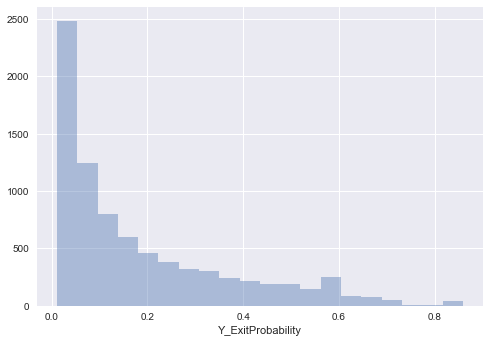

In [41]:
sns.distplot(Submission_30['Y_ExitProbability'], bins=20, kde=False)

In [239]:
print('Number of people with predicted probabilities above 0.5:',
      np.count_nonzero(Submission_30['Y_ExitProbability'][Submission_30['Y_ExitProbability']>=0.50]))

Number of people with predicted probabilities above 0.5: 782


In [192]:
Submission_30.to_csv('AnEnrichingMeal022618_Entry30.csv',index=False)

# Correlation Matrix of the probabilities from each model

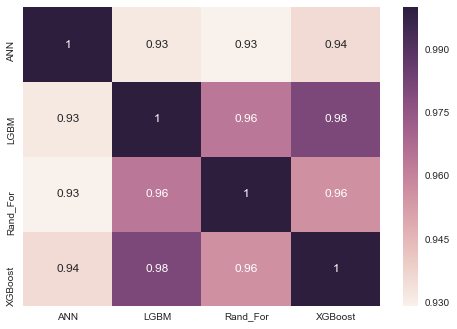

In [44]:
df = pd.DataFrame({'XGBoost': xgb_bagged_prediction,'Rand_For':rf_bagged_prediction,'LGBM':lgbm_bagged_prediction,
                   'ANN':ANN_test})

sns.heatmap(df.corr(),annot=True);